In [1]:
import pandas as pd
import sqlite3
import math
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('database.db')

In [3]:
c = conn.cursor()

In [4]:
c.executescript('drop table if exists dokter')
c.executescript('drop table if exists pasien')
c.executescript('drop table if exists obat')
c.executescript('drop table if exists data_transasksi')
c.execute("CREATE TABLE IF NOT EXISTS 'pasien' ('id_pasien' INT, 'kode' INT NULL, 'nama' VARCHAR(255) NULL, 'alamat' VARCHAR(255) NULL, 'penyakit' VARCHAR(255) NULL, PRIMARY KEY('id_pasien'))")
c.execute("CREATE TABLE IF NOT EXISTS 'obat' ('id_obat' INT, 'obat' VARCHAR(255) NULL, PRIMARY KEY('id_obat'))")
c.execute("CREATE TABLE IF NOT EXISTS 'dokter' ('id_dokter' INT,'nama_dokter' VARCHAR(255) NULL,'kategori_dokter' VARCHAR(255) NULL, 'pasien_id' INT NOT NULL, PRIMARY KEY('id_dokter'),FOREIGN KEY ('pasien_id') REFERENCES 'pasien' ('id_pasien') ON DELETE NO ACTION ON UPDATE NO ACTION)")
c.execute("CREATE TABLE IF NOT EXISTS 'data_transaksi' ('id_transaksi' INT,'harga_periksa' INT NULL, 'pembayaran' VARCHAR(255) NULL,'dokter_id' INT NOT NULL, 'obat_id' INT NOT NULL, PRIMARY KEY('id_transaksi'), FOREIGN KEY ('obat_id') REFERENCES 'obat' ('id_obat') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('dokter_id') REFERENCES 'dokter' ('id_dokter') ON DELETE NO ACTION ON UPDATE NO ACTION)")

In [5]:
data = pd.read_excel("rumah_sakit.xlsx")
data

,kode,nama,alamat,penyakit,kategori_dokter,pembayaran,harga_periksa,obat,nama_dokter
0,345099,Dika,Lamongan,Flu,Umum,BPJS,15000,20000,puji
1,345100,Dina,lamongan,Flu,Umum,BPJS,15000,20000,puji
2,345101,Diki,Lamongan,Flu,Umum,BPJS,15000,20000,puji
3,345102,Dodit,lamongan,Flu,Umum,BPJS,15000,20000,puji
4,345103,Jujun,Lamongan,Flu,Umum,BPJS,15000,20000,puji
...,...,...,...,...,...,...,...,...,...
94,345193,Bowo,Gresik,ambein,Spesialis,BPJS,40000,35000,ihsan
95,345194,Dudu,Gresik,Kanker,Spesialis,BPJS,150000,35000,ihsan
96,345195,Mala,Gresik,Kanker,Spesialis,BPJS,150000,35000,ihsan
97,345196,Gesang,Gresik,Kanker,Spesialis,BPJS,150000,35000,ihsan


In [6]:
pasien = []
for i,j in data.iterrows():
    if [j[0],j[1], j[2], j[3]] not in pasien:
        pasien.append([j[0], j[1], j[2],j[3]])
            
dokter = data['kategori_dokter'].unique()
obat = data['obat'].unique()
data_transaksi= []

for i,j in data.iterrows():   
    pas = -1
    for index, value in enumerate(pasien):
        if value == j[1]:
            pas = index+1
            break
    
    dok = -1
    for index, value in enumerate(dokter):
        if value == j[4]:
            dok = index+1
            break
        
    ob = -1
    for index, value in enumerate(obat):
        if value == j[7]:
            ob = index+1
    
    data_transaksi.append([j[6],j[5], pas, dok, ob])

In [7]:
c.execute("DELETE FROM PASIEN")
for index, i in enumerate(pasien):
    c.execute("INSERT INTO PASIEN VALUES ({},'{}','{}','{}','{}')".format(index, i[0],i[1],[2],i[3]))

c.execute("DELETE FROM DOKTER")
for index, i in enumerate(dokter):
    c.execute("INSERT INTO DOKTER VALUES ({},'{}','{}','{}')".format(index, i[0], i[1], i[2]))

c.execute("DELETE FROM OBAT")
for index, i in enumerate(obat):
    c.execute("INSERT INTO OBAT VALUES ({},'{}')".format(index, i))

c.execute("DELETE FROM DATA_TRANSAKSI")
for index, i in enumerate(data_transaksi):
    c.execute("INSERT INTO DATA_TRANSAKSI VALUES ({},'{}','{}','{}','{}')".format(index, i[0], i[1], i[2], i[3]))

In [8]:
c.execute('''SELECT * FROM PASIEN''')
PASIEN = []
for row in c.fetchall():
    PASIEN.append(row)
print("========================PASIEN==============================")
print(PASIEN)
print("============================================================")

c.execute('''SELECT * FROM DOKTER''')
DOKTER = []
for row in c.fetchall():
    DOKTER.append(row)
print("=========================DOKTER===============================")
print(DOKTER)
print("============================================================")

c.execute('''SELECT * FROM OBAT''')
OBAT = []
for row in c.fetchall():
    OBAT.append(row)
print("====================OBAT=========================")
print(OBAT)
print("============================================================")

c.execute('''SELECT * FROM DATA_TRANSAKSI''')
DATA_TRANSAKSI = []
for row in c.fetchall():
    DATA_TRANSAKSI.append(row)
print("========================DATA_TRANSAKSI============================")
print(DATA_TRANSAKSI)
print("============================================================")

========================PASIEN==============================
[(0, 345099, 'Dika', '[2]', 'Flu'), (1, 345100, 'Dina', '[2]', 'Flu'), (2, 345101, 'Diki', '[2]', 'Flu'), (3, 345102, 'Dodit', '[2]', 'Flu'), (4, 345103, 'Jujun', '[2]', 'Flu'), (5, 345104, 'yanto', '[2]', 'Demam'), (6, 345105, 'Kiki', '[2]', 'Demam'), (7, 345106, 'Agung', '[2]', 'Demam'), (8, 345107, 'Sofian', '[2]', 'Demam'), (9, 345108, 'Sinin', '[2]', 'Cacar Air'), (10, 345109, 'Jamal', '[2]', 'Cacar Air'), (11, 345110, 'Sandy', '[2]', 'Cacar Air'), (12, 345111, 'Dimas', '[2]', 'Cacar Air'), (13, 345112, 'Ovan', '[2]', 'Cacar Air'), (14, 345113, 'Romi', '[2]', 'Cacar Air'), (15, 345114, 'Guntur', '[2]', 'Cacar Air'), (16, 345115, 'Caca', '[2]', 'Cacar Air'), (17, 345116, 'Lala', '[2]', 'Cacar Air'), (18, 345117, 'Ilham', '[2]', 'Cacar Air'), (19, 345118, 'Dani', '[2]', 'Cacar Air'), (20, 345119, 'Wisnu', '[2]', 'Chikungunya'), (21, 345120, 'Fitri', '[2]', 'Chikungunya'), (22, 345121, 'Fida', '[2]', 'Chikungunya'), (23, 34

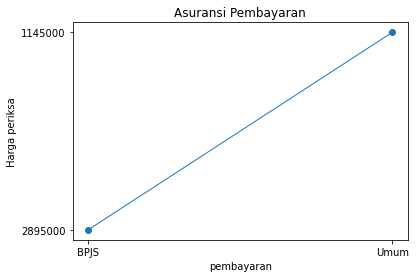

,Pembayaran,Harga Periksa
1,BPJS,2895000
2,Umum,1145000


In [9]:
c.execute('''SELECT pembayaran, sum(harga_periksa) as total
          FROM data_transaksi
          group by pembayaran
          order by pembayaran ASC
          ''')
data_transaksi = []
for row in c.fetchall():
    data_transaksi.append(row)

np_transaksi = np.array(data_transaksi)
plt.plot([ str(x[0]) for x in np_transaksi[:,:]], [ str(x[1]) for x in np_transaksi[:,:]],'-o',linewidth=1.0)
plt.xticks([ str(x[0]) for x in np_transaksi[:,:]], [ str(x[0]) for x in np_transaksi[:,:]])
plt.yticks([ str(x[1]) for x in np_transaksi[:,:]], [ str(x[1]) for x in np_transaksi[:,:]])
plt.xlabel('pembayaran')
plt.ylabel('Harga periksa')
plt.title("Asuransi Pembayaran")
plt.show()

data = pd.DataFrame([ x for x in np_transaksi[:,:]])
data.columns = ['Pembayaran', 'Harga Periksa']
data.index = np.arange(1,len(data)+1)
data

In [11]:
c.execute('''SELECT dokter.kategori_dokter, sum(data_transaksi.harga_periksa) as total
          FROM data_transaksi
          join dokter on data_transaksi.dokter_id = dokter.id_dokter
          group by dokter.kategori_dokter
          order by dokter.kategori_dokter ASC
          ''')
data_transaksi = []
for row in c.fetchall():
    data_transaksi.append(row)
np_dtTransaksi = np.array(data_transaksi)
print("========================HARGA PERIKSA================================")
data = pd.DataFrame([ x for x in np_dtTransaksi[:,:]])
data.columns = ['kategori dokter', 'Harga Periksa']
data.index = np.arange(1,len(data)+1)
data

========================HARGA PERIKSA================================


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed